In [173]:
def train(data, model, num_epochs=5, batch_size=64, learning_rate=1e-3):
    torch.manual_seed(42)
    criterion = nn.MSELoss() # mean square error loss
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5) 
    train_loader = torch.utils.data.DataLoader(data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    outputs = []
    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data # img size [1, 28, 28]
            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs

In [174]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

############################ Define Autoencoder ############################

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential( # like the Composition layer you built
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

        self.encoded_data = None

    def get_encoded_data(self):
        return self.encoded_data

    def forward(self, x):
        self.encoded_data  = self.encoder(x)
        #print(x)
        x = self.decoder(self.encoded_data)
        #print(x.shape)
        return x

def plot_image(image, index=0):
    plt.subplot(2, 9, index+1)
    plt.imshow(image)

############################ Load MNIST Data ############################

mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
dataset_size = 4096
mnist_data = list(mnist_data)[:dataset_size]
batch_size = 64
max_epochs = 20

train_loader = torch.utils.data.DataLoader(mnist_data, 
                                            batch_size=batch_size, 
                                            shuffle=True)

autoencoder = Autoencoder()
outputs = train(mnist_data, autoencoder, num_epochs=max_epochs)

'''
for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])
'''

# for name, param in autoencoder.named_parameters():
#     print(f"{name}: {param.shape}")


# Exploring filters outputs
'''
print(f"Number of batches: {len(train_loader)}")
for data in train_loader:
    x, y = data
    print("Batch shape: ", x.shape)
    plt.figure(figsize=(9, 2))
    for i, image in enumerate(x):
        print(f"Image Tensor shape: {image.shape}")
        y = autoencoder(image)
        print(f"Reconstructed image shape: {y.shape}")
        #print(y)

        # Showing encoded image
        for c, encoded_image in enumerate(y):
            plt.subplot(2, 16, c+1)
            plt.imshow(encoded_image.detach().numpy())
        plt.show()
        #plt.subplot(2, 9, i+1)
        #random_image = torch.randn(1, 28, 28)
        #formatted_image = image.squeeze().numpy()
        #print(f"Formatted image shape: {formatted_image.shape}")
        #plt.imshow(formatted_image)
    print(x.shape, y.shape)
'''

Epoch:1, Loss:0.0679
Epoch:2, Loss:0.0682
Epoch:3, Loss:0.0614
Epoch:4, Loss:0.0585
Epoch:5, Loss:0.0454
Epoch:6, Loss:0.0330
Epoch:7, Loss:0.0273
Epoch:8, Loss:0.0224
Epoch:9, Loss:0.0209
Epoch:10, Loss:0.0156
Epoch:11, Loss:0.0119
Epoch:12, Loss:0.0125
Epoch:13, Loss:0.0136
Epoch:14, Loss:0.0103
Epoch:15, Loss:0.0097
Epoch:16, Loss:0.0100
Epoch:17, Loss:0.0091
Epoch:18, Loss:0.0082
Epoch:19, Loss:0.0077
Epoch:20, Loss:0.0074


'\nprint(f"Number of batches: {len(train_loader)}")\nfor data in train_loader:\n    x, y = data\n    print("Batch shape: ", x.shape)\n    plt.figure(figsize=(9, 2))\n    for i, image in enumerate(x):\n        print(f"Image Tensor shape: {image.shape}")\n        y = autoencoder(image)\n        print(f"Reconstructed image shape: {y.shape}")\n        #print(y)\n\n        # Showing encoded image\n        for c, encoded_image in enumerate(y):\n            plt.subplot(2, 16, c+1)\n            plt.imshow(encoded_image.detach().numpy())\n        plt.show()\n        #plt.subplot(2, 9, i+1)\n        #random_image = torch.randn(1, 28, 28)\n        #formatted_image = image.squeeze().numpy()\n        #print(f"Formatted image shape: {formatted_image.shape}")\n        #plt.imshow(formatted_image)\n    print(x.shape, y.shape)\n'

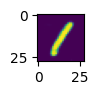

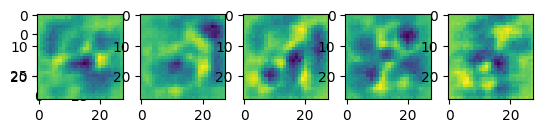

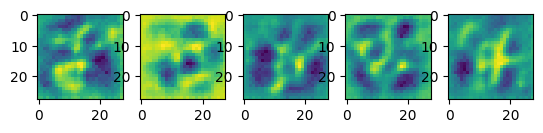

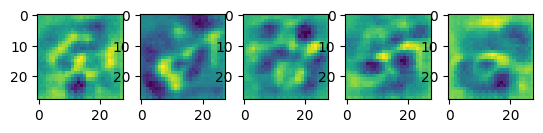

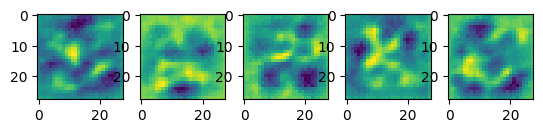

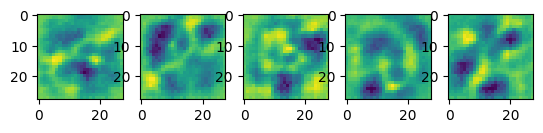

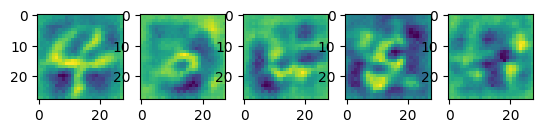

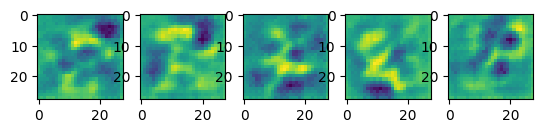

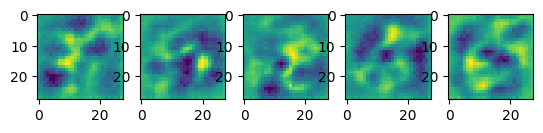

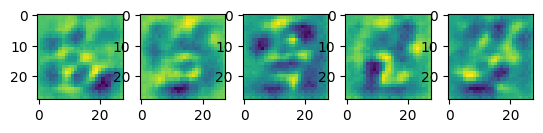

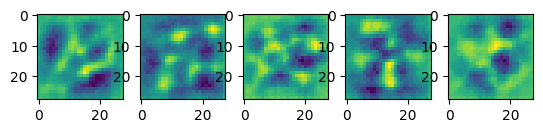

In [223]:
# Get image 
x1 = outputs[max_epochs-1][1][0,:,:,:] # first image
plot_image(x1.squeeze().numpy(), 0)

# Get encoded data
y = autoencoder(x1)
plot_image(y.detach().squeeze().numpy(), 0)
plt.show()
encoded_data = autoencoder.get_encoded_data()

# Plot decoded data
y = autoencoder.decoder(encoded_data)
plot_image(y.detach().squeeze().numpy(), 0)


# Get random point and encode it

max_random_points = 5
epochs = 10
for r in range(epochs):
    for i in range(max_random_points):
        random_point = torch.randn(1,64, 1, 1)
        y = autoencoder.decoder(random_point)
        #print(y.shape)
        plt.subplot(2, max_random_points, i+1)
        plt.imshow(y.detach().squeeze().numpy())
        # plot_image(y.detach().squeeze().numpy(), i)
    plt.show()

# Decode random point

torch.Size([1, 1, 28, 28])


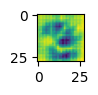

In [134]:
random_point = torch.randn(1,64, 1, 1)
y = autoencoder.decoder(random_point)
print(y.shape)
plot_image(y.detach().squeeze().numpy(), 0)
